#K Means Clustering
`Dr. Tehreem Qasim`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
# Generate random data for two features
np.random.seed(0)
feature1 = np.random.rand(100) * 20
feature2 = np.random.rand(100) * 20

# Create a pandas DataFrame
df = pd.DataFrame({'Feature1': feature1, 'Feature2': feature2})
df

,Feature1,Feature2
0,10.976270,13.556331
1,14.303787,5.400159
2,12.055268,14.703880
3,10.897664,19.243771
4,8.473096,4.975063
...,...,...
95,3.663827,9.809176
96,11.730259,4.548293
97,0.402151,5.087130
98,16.578801,1.160583


In [ ]:

# Perform K-means clustering with three clusters
kmeans = KMeans(n_clusters=5)
kmeans.fit(df)

# Get cluster centroids
centroids = kmeans.cluster_centers_
centroids

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([[14.95077091,  3.72646441,  5.58823529],
       [ 4.06794824,  5.41904512,  4.45454545],
       [16.70195962, 11.3275894 ,  1.        ],
       [ 3.17766439, 14.87755871,  3.68421053],
       [11.18719358, 15.29870163,  6.44827586]])

In [ ]:


# Get cluster labels for each data point
labels = kmeans.labels_
labels

array([4, 0, 4, 4, 1, 4, 4, 2, 0, 4, 2, 4, 4, 0, 3, 1, 3, 2, 4, 2, 2, 2,
       4, 2, 1, 4, 1, 0, 4, 1, 3, 2, 0, 0, 3, 4, 4, 4, 2, 2, 4, 1, 2, 3,
       4, 4, 1, 3, 3, 4, 0, 4, 0, 3, 1, 3, 4, 3, 1, 1, 3, 1, 4, 3, 3, 4,
       0, 1, 2, 1, 2, 0, 0, 0, 4, 1, 1, 3, 3, 1, 1, 4, 3, 0, 4, 3, 4, 3,
       4, 0, 1, 0, 1, 4, 3, 1, 0, 1, 0, 1], dtype=int32)

In [ ]:


# Add cluster labels to DataFrame
df['Cluster'] = labels

df

,Feature1,Feature2,Cluster
0,10.976270,13.556331,4
1,14.303787,5.400159,0
2,12.055268,14.703880,4
3,10.897664,19.243771,4
4,8.473096,4.975063,1
...,...,...,...
95,3.663827,9.809176,1
96,11.730259,4.548293,0
97,0.402151,5.087130,1
98,16.578801,1.160583,0


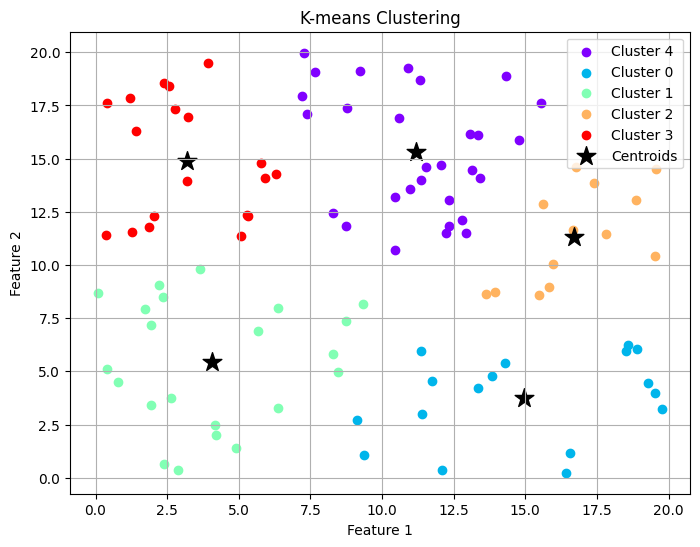

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def plot_clusters(df, num_clusters):
    """
    Plot clusters with distinct colors.

    Parameters:
        df (DataFrame): DataFrame containing features and 'Clusters' column.
        num_clusters (int): Number of clusters.

    Returns:
        None
    """
    # Get unique cluster labels
    cluster_labels = df['Cluster'].unique()

    # Set up colors for plotting
    colors = plt.cm.rainbow(np.linspace(0, 1, num_clusters))

    # Plot the clustered data points
    plt.figure(figsize=(8, 6))
    for label, color in zip(cluster_labels, colors):
        cluster_data = df[df['Cluster'] == label]
        plt.scatter(cluster_data['Feature1'], cluster_data['Feature2'], color=color, label=f'Cluster {label}')
     # Plot cluster centroids
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, color='black', label='Centroids')

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('K-means Clustering')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage:
# Assuming df and num_clusters are already defined
plot_clusters(df, np.unique(kmeans.labels_).shape[0])


In [ ]:
df

,Feature1,Feature2,Cluster
0,10.976270,13.556331,3
1,14.303787,5.400159,1
2,12.055268,14.703880,3
3,10.897664,19.243771,3
4,8.473096,4.975063,2
...,...,...,...
95,3.663827,9.809176,4
96,11.730259,4.548293,1
97,0.402151,5.087130,2
98,16.578801,1.160583,1


#Elbow Methos

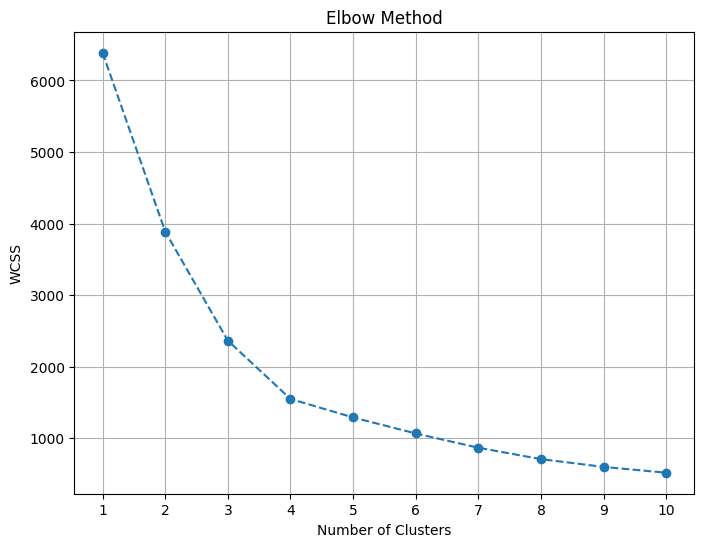

In [ ]:
from sklearn.cluster import KMeans
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

def elbow_method(df, max_clusters):
    """
    Perform the elbow method for determining the optimal number of clusters.

    Parameters:
        df (DataFrame): DataFrame containing features.
        max_clusters (int): Maximum number of clusters to consider.

    Returns:
        None
    """
    wcss = []  # Within-cluster sum of squares

    for i in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
        kmeans.fit(df)
        wcss.append(kmeans.inertia_)

    # Plot the elbow curve
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, max_clusters + 1), wcss, marker='o', linestyle='--')
    plt.title('Elbow Method')
    plt.xlabel('Number of Clusters')
    plt.ylabel('WCSS')
    plt.xticks(range(1, max_clusters + 1))
    plt.grid(True)
    plt.show()

# Example usage:
# Assuming df and max_clusters are already defined
elbow_method(df[['Feature1', 'Feature2']], max_clusters=10)
